# Libraries

In [1]:
# numerical analysis
import numpy as np
# storing and processing in dataframes
import pandas as pd
# simple plotting
import matplotlib.pyplot as plt
# advanced plotting
import seaborn as sns

# splitting dataset into train and test
from sklearn.model_selection import train_test_split
# scaling features
from sklearn.preprocessing import StandardScaler
# selecting important features
from sklearn.feature_selection import RFECV
# k nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
# accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Theme

In [2]:
# plot style
sns.set_style('whitegrid')
# color palettes
pal = ['#0e2433', '#ff007f']

# Data

In [3]:
# read data
df = pd.read_csv('./cancer_data.csv')

# first few rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data properties

In [4]:
df.shape

(569, 33)

In [5]:
# columns names
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# Exploring the data

* There is an inbalance in no. of observations in each class.
* This will possibley lead to a biased model.
* Idealy we want to have approximatly equal no. of observation all the classes.
  
* In this case we can bring down the no. of observation in the 'B' class to no. of obeservation in the 'M'

### Is the mean radius of malignant and benign cancers the same?

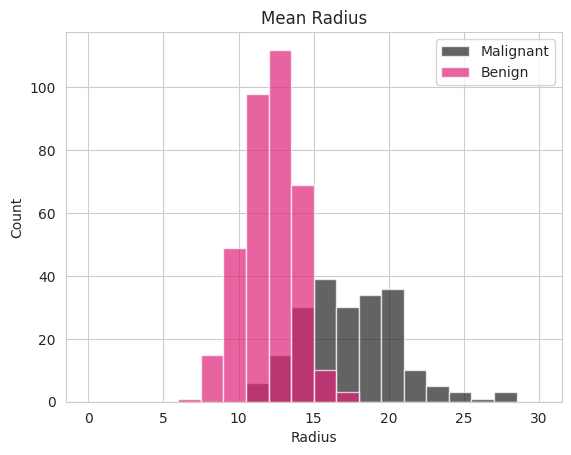

In [6]:
fig, ax = plt.subplots()
m = ax.hist(df[df["diagnosis"] == "M"]['radius_mean'], bins=20, range=(0, 30), 
            label = "Malignant", alpha=0.7, color='#232121')
b = ax.hist(df[df["diagnosis"] == "B"]['radius_mean'], bins=20, range=(0, 30), 
            label = "Benign", alpha=0.7, color='#df2378')
plt.xlabel("Radius")
plt.ylabel("Count")
plt.title("Mean Radius")
plt.legend()
plt.show()

In [7]:
print('Min radius of benign cancer :', df[df['diagnosis']=='B']['radius_mean'].min())
print('Max radius of benign cancer :', df[df['diagnosis']=='B']['radius_mean'].max())
print('Min radius of malignant cancer :', df[df['diagnosis']=='M']['radius_mean'].min())
print('Min radius of malignant cancer :', df[df['diagnosis']=='M']['radius_mean'].max())

Min radius of benign cancer : 6.981
Max radius of benign cancer : 17.85
Min radius of malignant cancer : 10.95
Min radius of malignant cancer : 28.11


# Correlation heatmap

<ipython-input-8-0cbf90ead0a2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdGy')


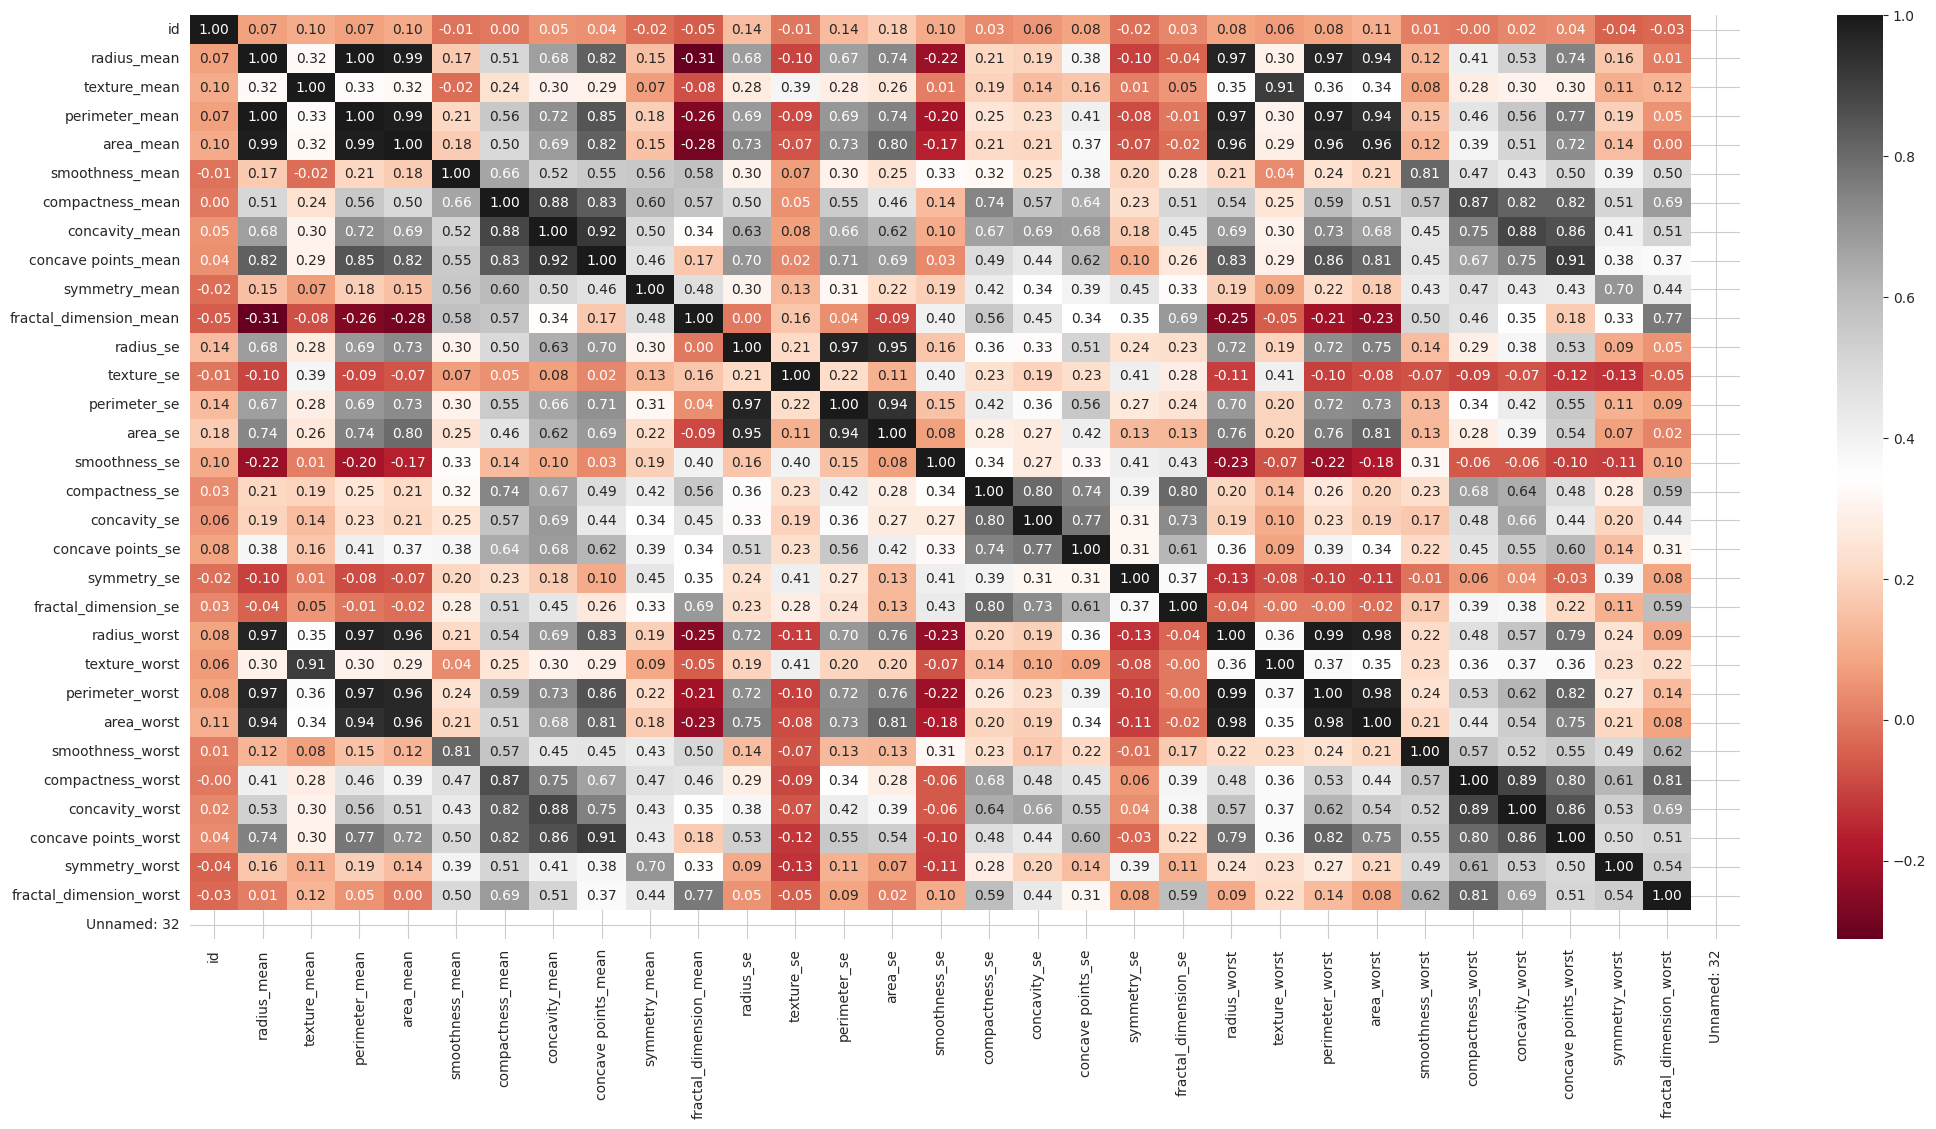

In [8]:
# figure size
plt.figure(figsize=(25, 12))
# plot heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdGy')
# show figure
plt.show()

# Preprocessing

In [9]:
# Drop unwanted columns

df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
print(df.shape)

(569, 31)


In [10]:
# encoding diagnosis data

df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x=='M' else 0)

In [11]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# ML Modeling

In [12]:
# features and labels
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [15]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# model initialization
model = KNeighborsClassifier()

# model fitting
model.fit(X_train, y_train)

# predict using the model
pred = model.predict(X_test)

# model validation
print(accuracy_score(pred, y_test))
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

0.956140350877193
[[71  5]
 [ 0 38]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        76
           1       0.88      1.00      0.94        38

    accuracy                           0.96       114
   macro avg       0.94      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114



<Axes: >

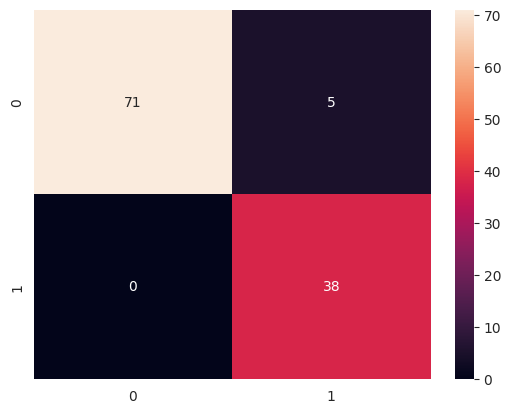

In [17]:
sns.heatmap(confusion_matrix(pred, y_test), annot=True, fmt="d")

In [ ]:
neighbors_settings = [i for i in range(1,15)]
print('不同的k值:', neighbors_settings)

不同的k值: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [ ]:
training_accuracy = []
testing_accuracy = []
for neighbors in neighbors_settings:
  clf = KNeighborsClassifier(n_neighbors = neighbors)
  clf.fit(X_train, y_train)
  training_accuracy.append(clf.score(X_train, y_train))
  testing_accuracy.append(clf.score(X_test, y_test))

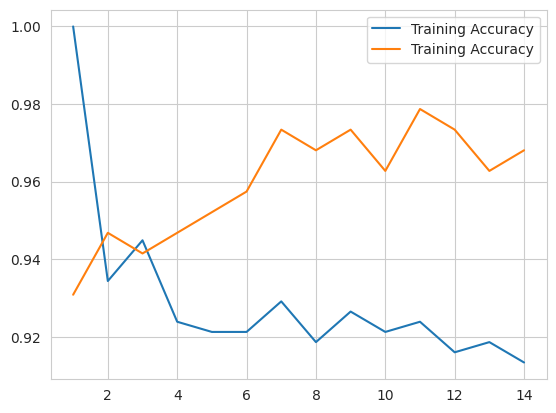

In [ ]:
plt.plot(neighbors_settings, training_accuracy, label = "Training Accuracy")
plt.plot(neighbors_settings, testing_accuracy, label = "Training Accuracy")
plt.legend()
plt.show()